In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('/kaggle/input/global-economy-indicators/Global Economy Indicators.csv')

In [59]:
df = df.convert_dtypes()

In [60]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [61]:
# Clean the 'Country' column
df['Country'] = df['Country'].str.strip()  # Remove leading/trailing spaces
df['Country'] = df['Country'].str.lower()  # Standardize to title case (e.g., "afghanistan" -> "Afghanistan")

In [62]:
df.columns

Index(['CountryID', 'Country', 'Year', 'AMA exchange rate',
       'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI',
       'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Final consumption expenditure',
       'General government final consumption expenditure',
       'Gross capital formation',
       'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
       'Household consumption expenditure (including Non-profit institutions serving households)',
       'Imports of goods and services', 'Manufacturing (ISIC D)',
       'Mining, Manufacturing, Utilities (ISIC C-E)',
       'Other Activities (ISIC J-P)', 'Total Value Added',
       'Transport, storage and communication (ISIC I)',
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
       'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)'],
    

In [63]:
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,869917407,<NA>,...,1551094283,195277226,370146827,376690811,127747843,1731454254,83917200,226387091,1766527525,1731435587
1,4,afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,910828104,<NA>,...,1675426407,276296480,387549502,394401164,133754097,1812857077,87860382,237019196,1850121913,1812837521
2,4,afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,827945340,<NA>,...,1498811856,290370350,352284669,358512865,121582672,1647917912,79864525,215477287,1683947905,1647900178
3,4,afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,855486925,<NA>,...,1508023800,262962880,364010279,370445793,125630236,1702734673,82528885,222624293,1739998153,1702716294
4,4,afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1035913365,<NA>,...,1778819221,305679151,440760406,448552790,152119162,2061751510,99918604,269525910,2106420227,2061729287


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   CountryID                                                                                 10512 non-null  Int64  
 1   Country                                                                                   10512 non-null  string 
 2   Year                                                                                      10512 non-null  Int64  
 3   AMA exchange rate                                                                         10512 non-null  Float64
 4   IMF based exchange rate                                                                   10512 non-null  Float64
 5   Population                                           

In [65]:
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.0,10512.0,10512.0,10512.0,10512.0,10512.0,10391.0,8671.0,10512.0,10491.0,...,10460.0,10470.0,10469.0,10512.0,10512.0,10512.0,10463.0,10463.0,10512.0,10512.0
mean,431.116629,1996.262747,357.395851,341.984639,28515225.809741,8965.564593,7793212164.361178,1626543202.949372,10021989861.229927,46711757655.537987,...,105504146606.433365,45915038487.032852,30925855439.017765,41532817459.494102,74744872505.042236,174479532361.33667,15567574468.363184,25095679876.122047,182526026614.443878,182876492569.559174
std,251.16909,14.900361,2291.1278,1941.857487,114129598.544995,17070.205895,40343487480.507347,8932352980.366264,49855964022.520439,174885669892.443573,...,603845374920.007568,180435051692.96283,172390960942.903442,211257614896.694885,484056758879.002686,974604096336.679688,91873588072.227707,139172737159.838654,994214438370.938354,984599654555.466553
min,4.0,1970.0,0.0,0.0,4359.0,34.0,28139.0,-151000000000.0,157728.0,-1669759280.0,...,796026.0,1982159.0,-248499.0,-2581190.0,1044040.0,2411113.0,-6479048.0,230209.0,3564833.0,2585174.0
25%,212.0,1984.0,1.0,1.0,633061.5,730.0,130452157.0,467354.5,68155233.75,402672455.5,...,938989697.5,589146947.75,110949721.0,185703775.5,355589090.0,1355670405.75,89988282.0,207873170.5,1410771595.25,1439216839.5
50%,430.0,1997.0,2.812895,2.761315,5051556.0,2316.5,931367444.0,68296349.0,371770132.5,2407905656.0,...,5154424420.0,2891919117.0,911354309.0,1597026566.0,2107420904.0,7493970876.5,544150000.0,1056493224.0,7887233337.5,8070571563.0
75%,643.0,2009.0,51.343163,48.066844,16788618.5,8965.75,4023325990.5,691075032.0,2815730482.75,15424917733.5,...,30089053832.5,16023121699.0,7405363702.0,12513576046.5,14421304306.75,48191442319.0,3975893052.0,6707456460.5,50057889497.5,51725961801.75
max,894.0,2021.0,111636.6283,42000.0,1425893465.0,234317.0,1350000000000.0,211000000000.0,1240000000000.0,3530000000000.0,...,15900000000000.0,3400000000000.0,4870000000000.0,5780000000000.0,12900000000000.0,23300000000000.0,2490000000000.0,3520000000000.0,23600000000000.0,23300000000000.0


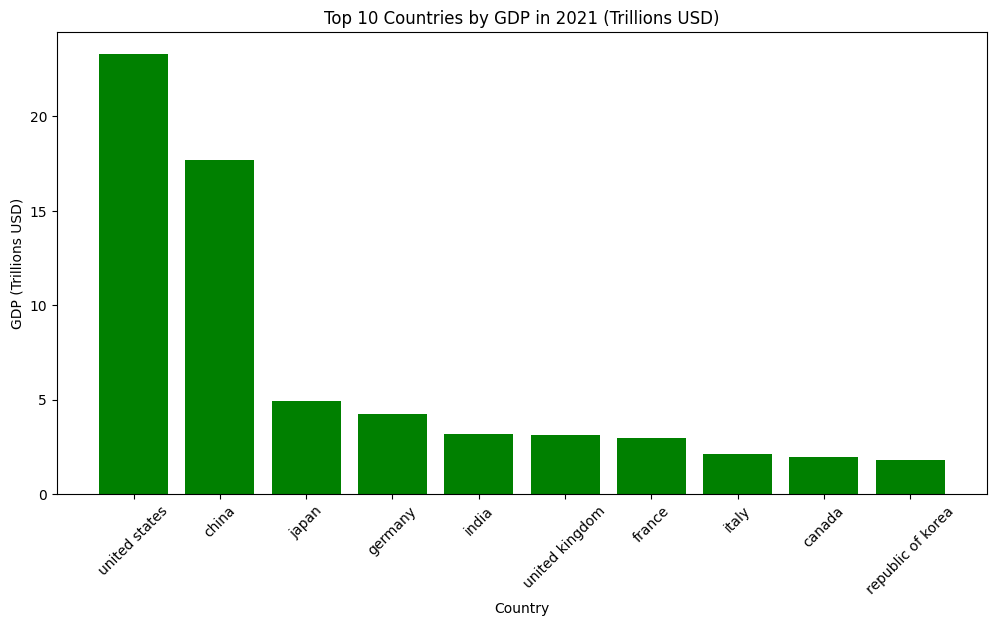

In [66]:
# Filter for 2021
data_2021 = df[df['Year'] == 2021]

# Sort by GDP and get top 10
top_10_gdp = data_2021.nlargest(10, 'Gross Domestic Product (GDP)')

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_gdp['Country'], top_10_gdp['Gross Domestic Product (GDP)'] / 1e12, color='green')
plt.title('Top 10 Countries by GDP in 2021 (Trillions USD)')
plt.xlabel('Country')
plt.ylabel('GDP (Trillions USD)')
plt.xticks(rotation=45)
plt.show()

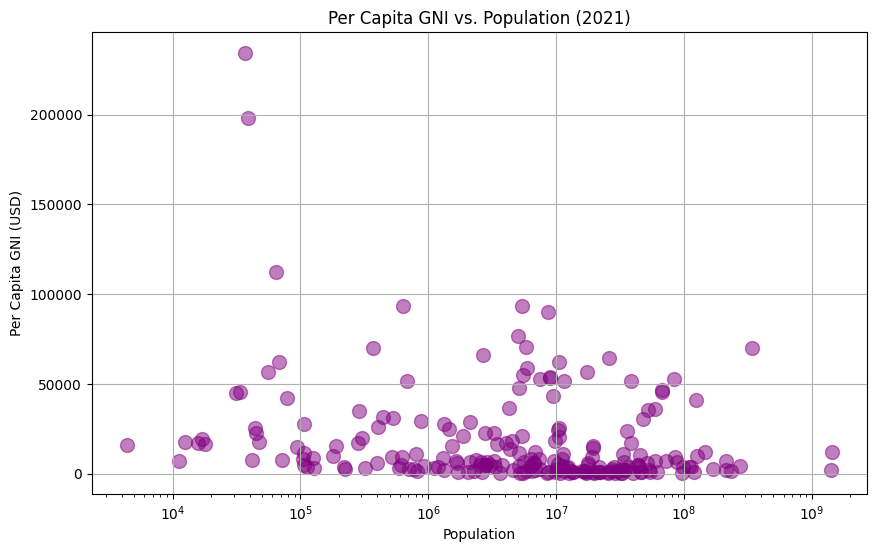

In [67]:
# Use data from 2021 for consistency
plt.figure(figsize=(10, 6))
plt.scatter(data_2021['Population'], data_2021['Per capita GNI'], 
            s=100, alpha=0.5, c='purple')
plt.title('Per Capita GNI vs. Population (2021)')
plt.xlabel('Population')
plt.ylabel('Per Capita GNI (USD)')
plt.xscale('log')  # Log scale for population due to wide range
plt.grid(True)
plt.show()

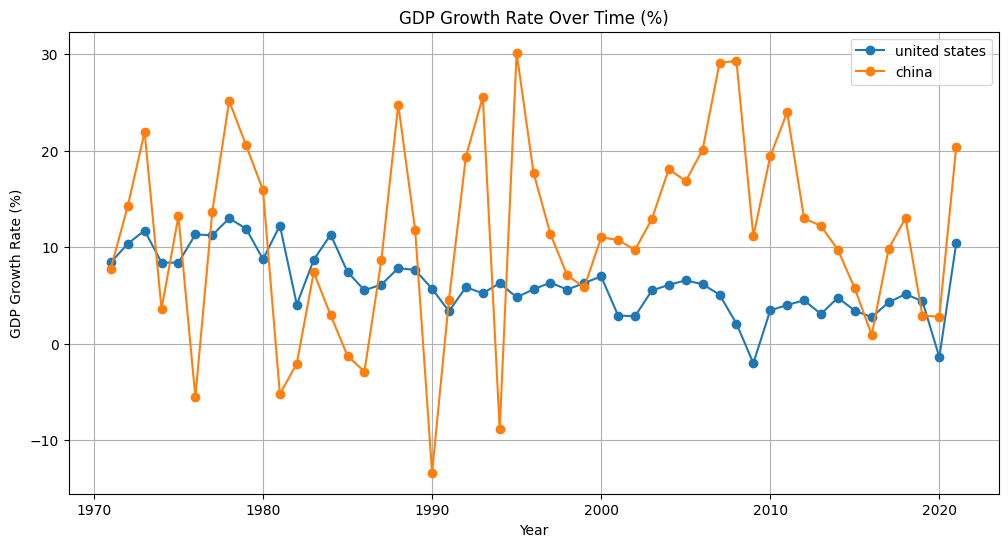

In [68]:
# Select a few countries
countries = ['united states', 'china']
selected_data = df[df['Country'].isin(countries)].copy()

# Calculate GDP growth rate
selected_data['GDP Growth Rate'] = selected_data.groupby('Country')['Gross Domestic Product (GDP)'].pct_change() * 100

# Pivot for plotting
pivot_data = selected_data.pivot(index='Year', columns='Country', values='GDP Growth Rate')

# Plot
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(pivot_data.index, pivot_data[country], marker='o', label=country)
plt.title('GDP Growth Rate Over Time (%)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

Epoch [300/6000], Train Loss: 0.229948, Val Loss: 1.442664, Patience: 0/300
Epoch [600/6000], Train Loss: 0.170577, Val Loss: 1.219648, Patience: 0/300
Epoch [900/6000], Train Loss: 0.107290, Val Loss: 0.848933, Patience: 0/300
Epoch [1200/6000], Train Loss: 0.093972, Val Loss: 0.643171, Patience: 0/300
Epoch [1500/6000], Train Loss: 0.087954, Val Loss: 0.585785, Patience: 0/300
Epoch [1800/6000], Train Loss: 0.078446, Val Loss: 0.502423, Patience: 0/300
Epoch [2100/6000], Train Loss: 0.063502, Val Loss: 0.372366, Patience: 0/300
Epoch [2400/6000], Train Loss: 0.046100, Val Loss: 0.219971, Patience: 0/300
Epoch [2700/6000], Train Loss: 0.036140, Val Loss: 0.126761, Patience: 0/300
Epoch [3000/6000], Train Loss: 0.033679, Val Loss: 0.099076, Patience: 0/300
Epoch [3300/6000], Train Loss: 0.032795, Val Loss: 0.093642, Patience: 0/300
Epoch [3600/6000], Train Loss: 0.031914, Val Loss: 0.093209, Patience: 96/300
Early stopping triggered after 3804 epochs. Best validation loss: 0.093136
Tra

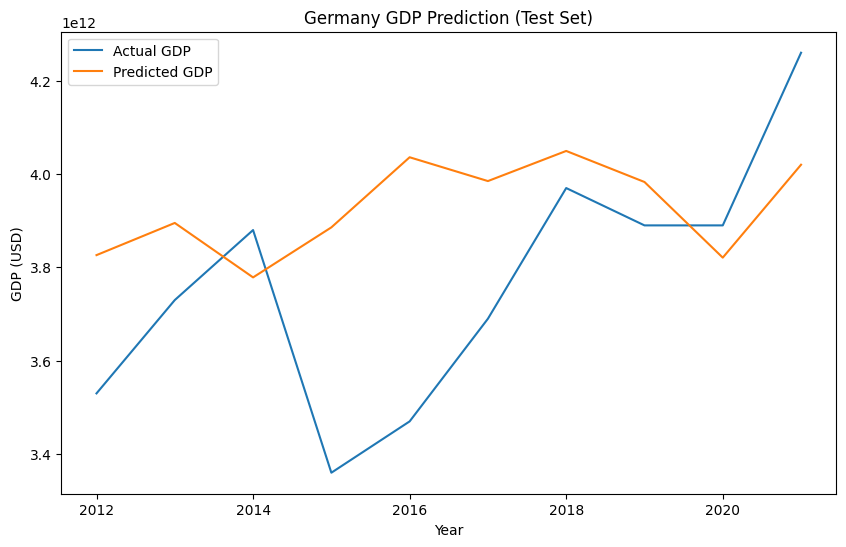

In [85]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- Step 1: Load and Clean Data ---
df = pd.read_csv('/kaggle/input/global-economy-indicators/Global Economy Indicators.csv')
df = df.convert_dtypes()
df.columns = df.columns.str.strip()  # Clean column names
df['Country'] = df['Country'].str.strip().str.lower()  # Clean country names: remove spaces and lowercase

# --- Step 2: Filter and Preprocess Data ---
# Filter for Germany
germany_data = df[df['Country'] == 'germany'].sort_values('Year')

# Check if Germany data exists
if germany_data.empty:
    raise ValueError("No data found for 'germany'. Check country name or data.")
    
# Select features (univariate: GDP only)
features = ['Gross Domestic Product (GDP)']
if not all(col in germany_data.columns for col in features):
    raise ValueError(f"Features {features} not found in columns: {germany_data.columns}")

# Extract data and handle missing values
data = germany_data[features + ['Year']].dropna()
if data.empty:
    raise ValueError("All data dropped due to missing values. Check for NaNs in features or 'Year'.")

# Create sequences before scaling
sequence_length = 5
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i + sequence_length].values)  # 5-year sequence
    y.append(data[features].iloc[i + sequence_length].values[0])  # Next GDP value
X = np.array(X)  # Shape: (samples, sequence_length, num_features)
y = np.array(y)  # Shape: (samples,)

# Split into train, validation, and test sets (60% train, 20% val, 20% test)
train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train = X[:train_size]
X_val = X[train_size:train_size + val_size]
X_test = X[train_size + val_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + val_size]
y_test = y[train_size + val_size:]

# Normalize each split separately
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, len(features))).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, len(features))).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, len(features))).reshape(X_test.shape)

# Scale y separately
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train_scaled)
X_val = torch.FloatTensor(X_val_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_train = torch.FloatTensor(y_train_scaled)
y_val = torch.FloatTensor(y_val_scaled)
y_test = torch.FloatTensor(y_test_scaled)

# --- Step 3: Define the PyTorch Model ---
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TimeSeriesLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
input_size = len(features)  # 1 for GDP only
hidden_size = 256
num_layers = 4
output_size = 1
model = TimeSeriesLSTM(input_size, hidden_size, num_layers, output_size)

# --- Step 4: Set Up Training with Early Stopping ---
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000003)

# Early stopping parameters
patience = 300
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None
num_epochs = 6000

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val).squeeze()
        val_loss = criterion(val_outputs, y_val)
    
    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()  # Save the best model
        patience_counter = 0  # Reset counter
    else:
        patience_counter += 1
    
    if (epoch + 1) % 300 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}, Patience: {patience_counter}/{patience}')
    
    if patience_counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs. Best validation loss: {best_val_loss.item():.6f}')
        break

# Load the best model state
model.load_state_dict(best_model_state)

# --- Step 5: Evaluate the Model ---
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).squeeze()
    y_val_pred = model(X_val).squeeze()
    y_test_pred = model(X_test).squeeze()

# Inverse transform predictions and actual values
y_train_original = y_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_val_pred_original = y_scaler.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculate RMSE for train, val, and test
train_rmse = np.sqrt(np.mean((y_train_original - y_train_pred_original) ** 2))
val_rmse = np.sqrt(np.mean((y_val_original - y_val_pred_original) ** 2))
test_rmse = np.sqrt(np.mean((y_test_original - y_test_pred_original) ** 2))

print(f'Train RMSE (original scale): {train_rmse:.2f}')
print(f'Validation RMSE (original scale): {val_rmse:.2f}')
print(f'Test RMSE (original scale): {test_rmse:.2f}')

# Plot results for test set
plt.figure(figsize=(10, 6))
test_years = germany_data['Year'].iloc[train_size + val_size + sequence_length:].values
plt.plot(test_years, y_test_original, label='Actual GDP')
plt.plot(test_years, y_test_pred_original, label='Predicted GDP')
plt.title('Germany GDP Prediction (Test Set)')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend()
plt.show()

Epoch [300/6000], Train Loss: 0.381585, Val Loss: 2.930932, Patience: 0/300
Epoch [600/6000], Train Loss: 0.287307, Val Loss: 2.588631, Patience: 0/300
Epoch [900/6000], Train Loss: 0.142512, Val Loss: 1.831190, Patience: 0/300
Epoch [1200/6000], Train Loss: 0.097779, Val Loss: 1.212145, Patience: 0/300
Epoch [1500/6000], Train Loss: 0.089575, Val Loss: 1.090798, Patience: 0/300
Epoch [1800/6000], Train Loss: 0.078417, Val Loss: 0.931527, Patience: 0/300
Epoch [2100/6000], Train Loss: 0.063424, Val Loss: 0.710302, Patience: 0/300
Epoch [2400/6000], Train Loss: 0.046772, Val Loss: 0.458483, Patience: 0/300
Epoch [2700/6000], Train Loss: 0.034493, Val Loss: 0.271845, Patience: 0/300
Epoch [3000/6000], Train Loss: 0.029324, Val Loss: 0.190635, Patience: 0/300
Epoch [3300/6000], Train Loss: 0.027935, Val Loss: 0.166751, Patience: 0/300
Epoch [3600/6000], Train Loss: 0.027374, Val Loss: 0.161414, Patience: 0/300
Epoch [3900/6000], Train Loss: 0.026826, Val Loss: 0.163419, Patience: 254/300


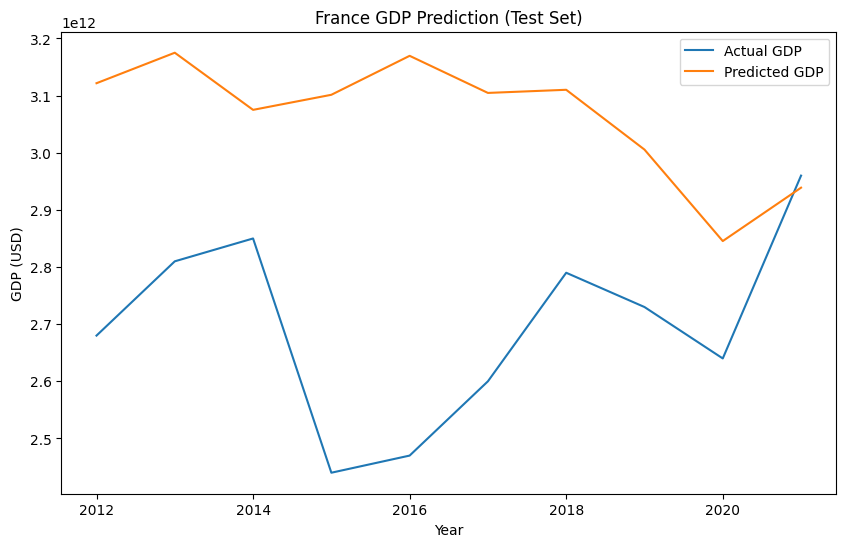

In [86]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- Step 1: Load and Clean Data ---
df = pd.read_csv('/kaggle/input/global-economy-indicators/Global Economy Indicators.csv')
df = df.convert_dtypes()
df.columns = df.columns.str.strip()  # Clean column names
df['Country'] = df['Country'].str.strip().str.lower()  # Clean country names: remove spaces and lowercase

# --- Step 2: Filter and Preprocess Data ---
# Filter for Germany
france_data = df[df['Country'] == 'france'].sort_values('Year')

# Check if Germany data exists
if france_data.empty:
    raise ValueError("No data found for 'germany'. Check country name or data.")
    
# Select features (univariate: GDP only)
features = ['Gross Domestic Product (GDP)']
if not all(col in france_data.columns for col in features):
    raise ValueError(f"Features {features} not found in columns: {france_data.columns}")

# Extract data and handle missing values
data = france_data[features + ['Year']].dropna()
if data.empty:
    raise ValueError("All data dropped due to missing values. Check for NaNs in features or 'Year'.")

# Create sequences before scaling
sequence_length = 5
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i + sequence_length].values)  # 5-year sequence
    y.append(data[features].iloc[i + sequence_length].values[0])  # Next GDP value
X = np.array(X)  # Shape: (samples, sequence_length, num_features)
y = np.array(y)  # Shape: (samples,)

# Split into train, validation, and test sets (60% train, 20% val, 20% test)
train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train = X[:train_size]
X_val = X[train_size:train_size + val_size]
X_test = X[train_size + val_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + val_size]
y_test = y[train_size + val_size:]

# Normalize each split separately
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, len(features))).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, len(features))).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, len(features))).reshape(X_test.shape)

# Scale y separately
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train_scaled)
X_val = torch.FloatTensor(X_val_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_train = torch.FloatTensor(y_train_scaled)
y_val = torch.FloatTensor(y_val_scaled)
y_test = torch.FloatTensor(y_test_scaled)

# --- Step 3: Define the PyTorch Model ---
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TimeSeriesLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
input_size = len(features)  # 1 for GDP only
hidden_size = 256
num_layers = 4
output_size = 1
model = TimeSeriesLSTM(input_size, hidden_size, num_layers, output_size)

# --- Step 4: Set Up Training with Early Stopping ---
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000003)

# Early stopping parameters
patience = 300
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None
num_epochs = 6000

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val).squeeze()
        val_loss = criterion(val_outputs, y_val)
    
    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()  # Save the best model
        patience_counter = 0  # Reset counter
    else:
        patience_counter += 1
    
    if (epoch + 1) % 300 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}, Patience: {patience_counter}/{patience}')
    
    if patience_counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs. Best validation loss: {best_val_loss.item():.6f}')
        break

# Load the best model state
model.load_state_dict(best_model_state)

# --- Step 5: Evaluate the Model ---
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).squeeze()
    y_val_pred = model(X_val).squeeze()
    y_test_pred = model(X_test).squeeze()

# Inverse transform predictions and actual values
y_train_original = y_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_val_pred_original = y_scaler.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculate RMSE for train, val, and test
train_rmse = np.sqrt(np.mean((y_train_original - y_train_pred_original) ** 2))
val_rmse = np.sqrt(np.mean((y_val_original - y_val_pred_original) ** 2))
test_rmse = np.sqrt(np.mean((y_test_original - y_test_pred_original) ** 2))

print(f'Train RMSE (original scale): {train_rmse:.2f}')
print(f'Validation RMSE (original scale): {val_rmse:.2f}')
print(f'Test RMSE (original scale): {test_rmse:.2f}')

# Plot results for test set
plt.figure(figsize=(10, 6))
test_years = france_data['Year'].iloc[train_size + val_size + sequence_length:].values
plt.plot(test_years, y_test_original, label='Actual GDP')
plt.plot(test_years, y_test_pred_original, label='Predicted GDP')
plt.title('France GDP Prediction (Test Set)')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend()
plt.show()

Epoch [300/6000], Train Loss: 0.174313, Val Loss: 0.574437, Patience: 0/300
Epoch [600/6000], Train Loss: 0.139875, Val Loss: 0.446703, Patience: 0/300
Epoch [900/6000], Train Loss: 0.117472, Val Loss: 0.298977, Patience: 0/300
Epoch [1200/6000], Train Loss: 0.113880, Val Loss: 0.241221, Patience: 0/300
Epoch [1500/6000], Train Loss: 0.110782, Val Loss: 0.214626, Patience: 0/300
Epoch [1800/6000], Train Loss: 0.104947, Val Loss: 0.169189, Patience: 0/300
Epoch [2100/6000], Train Loss: 0.092079, Val Loss: 0.081547, Patience: 0/300
Epoch [2400/6000], Train Loss: 0.065267, Val Loss: 0.027347, Patience: 66/300
Early stopping triggered after 2634 epochs. Best validation loss: 0.014404
Train RMSE (original scale): 36676833661.40
Validation RMSE (original scale): 109963862790.63
Test RMSE (original scale): 79384005687.42


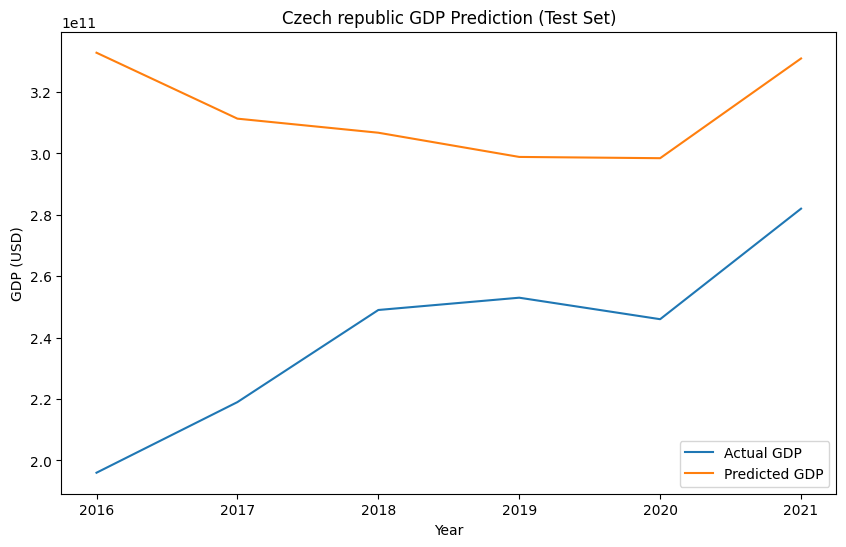

In [90]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- Step 1: Load and Clean Data ---
df = pd.read_csv('/kaggle/input/global-economy-indicators/Global Economy Indicators.csv')
df = df.convert_dtypes()
df.columns = df.columns.str.strip()  # Clean column names
df['Country'] = df['Country'].str.strip().str.lower()  # Clean country names: remove spaces and lowercase

# --- Step 2: Filter and Preprocess Data ---
# Filter for Germany
czech_data = df[df['Country'] == 'czechia'].sort_values('Year')

# Check if Germany data exists
if czech_data.empty:
    raise ValueError("No data found for 'germany'. Check country name or data.")
    
# Select features (univariate: GDP only)
features = ['Gross Domestic Product (GDP)']
if not all(col in czech_data.columns for col in features):
    raise ValueError(f"Features {features} not found in columns: {czech_data.columns}")

# Extract data and handle missing values
data = czech_data[features + ['Year']].dropna()
if data.empty:
    raise ValueError("All data dropped due to missing values. Check for NaNs in features or 'Year'.")

# Create sequences before scaling
sequence_length = 5
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i + sequence_length].values)  # 5-year sequence
    y.append(data[features].iloc[i + sequence_length].values[0])  # Next GDP value
X = np.array(X)  # Shape: (samples, sequence_length, num_features)
y = np.array(y)  # Shape: (samples,)

# Split into train, validation, and test sets (60% train, 20% val, 20% test)
train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train = X[:train_size]
X_val = X[train_size:train_size + val_size]
X_test = X[train_size + val_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + val_size]
y_test = y[train_size + val_size:]

# Normalize each split separately
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, len(features))).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, len(features))).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, len(features))).reshape(X_test.shape)

# Scale y separately
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train_scaled)
X_val = torch.FloatTensor(X_val_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_train = torch.FloatTensor(y_train_scaled)
y_val = torch.FloatTensor(y_val_scaled)
y_test = torch.FloatTensor(y_test_scaled)

# --- Step 3: Define the PyTorch Model ---
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TimeSeriesLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
input_size = len(features)  # 1 for GDP only
hidden_size = 256
num_layers = 4
output_size = 1
model = TimeSeriesLSTM(input_size, hidden_size, num_layers, output_size)

# --- Step 4: Set Up Training with Early Stopping ---
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000003)

# Early stopping parameters
patience = 300
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None
num_epochs = 6000

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val).squeeze()
        val_loss = criterion(val_outputs, y_val)
    
    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()  # Save the best model
        patience_counter = 0  # Reset counter
    else:
        patience_counter += 1
    
    if (epoch + 1) % 300 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}, Patience: {patience_counter}/{patience}')
    
    if patience_counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs. Best validation loss: {best_val_loss.item():.6f}')
        break

# Load the best model state
model.load_state_dict(best_model_state)

# --- Step 5: Evaluate the Model ---
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).squeeze()
    y_val_pred = model(X_val).squeeze()
    y_test_pred = model(X_test).squeeze()

# Inverse transform predictions and actual values
y_train_original = y_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_val_pred_original = y_scaler.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

# Calculate RMSE for train, val, and test
train_rmse = np.sqrt(np.mean((y_train_original - y_train_pred_original) ** 2))
val_rmse = np.sqrt(np.mean((y_val_original - y_val_pred_original) ** 2))
test_rmse = np.sqrt(np.mean((y_test_original - y_test_pred_original) ** 2))

print(f'Train RMSE (original scale): {train_rmse:.2f}')
print(f'Validation RMSE (original scale): {val_rmse:.2f}')
print(f'Test RMSE (original scale): {test_rmse:.2f}')

# Plot results for test set
plt.figure(figsize=(10, 6))
test_years = czech_data['Year'].iloc[train_size + val_size + sequence_length:].values
plt.plot(test_years, y_test_original, label='Actual GDP')
plt.plot(test_years, y_test_pred_original, label='Predicted GDP')
plt.title('Czech republic GDP Prediction (Test Set)')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend()
plt.show()